## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [8]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.layers import Dropout
"""
Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""
Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.4, 0.6] 

In [22]:
results = {}
"""
Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with dropout ratio = %.1f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with dropout ratio = 0.2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)    

50000/50000 [==============================] - 12s 232us/step - loss: 1.4013 - accuracy: 0.4959 - val_loss: 1.3767 - val_accuracy: 0.5136
Epoch 46/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3895 - accuracy: 0.4990 - val_loss: 1.3825 - val_accuracy: 0.5038
Epoch 47/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3890 - accuracy: 0.5027 - val_loss: 1.3957 - val_accuracy: 0.5023
Epoch 48/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3879 - accuracy: 0.4998 - val_loss: 1.3944 - val_accuracy: 0.5031
Epoch 49/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.3841 - accuracy: 0.5045 - val_loss: 1.3628 - val_accuracy: 0.5187
Epoch 50/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.3812 - accuracy: 0.5052 - val_loss: 1.3900 - val_accuracy: 0.5000
Experiment with dropout ratio = 0.2
Model: "model_1"
___________________________________________________________

50000/50000 [==============================] - 18s 370us/step - loss: 1.7620 - accuracy: 0.3561 - val_loss: 1.7279 - val_accuracy: 0.3853
Epoch 40/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.7659 - accuracy: 0.3543 - val_loss: 1.7638 - val_accuracy: 0.3806
Epoch 41/50
50000/50000 [==============================] - 15s 310us/step - loss: 1.7658 - accuracy: 0.3553 - val_loss: 1.7304 - val_accuracy: 0.3833
Epoch 42/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7582 - accuracy: 0.3597 - val_loss: 1.7010 - val_accuracy: 0.4045
Epoch 43/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.7538 - accuracy: 0.3596 - val_loss: 1.7433 - val_accuracy: 0.3861
Epoch 44/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.7548 - accuracy: 0.3600 - val_loss: 1.7078 - val_accuracy: 0.4026
Epoch 45/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.7549 - accuracy: 0.3608 - va

50000/50000 [==============================] - 19s 387us/step - loss: 2.1488 - accuracy: 0.1617 - val_loss: 2.3831 - val_accuracy: 0.1106
Epoch 31/50
50000/50000 [==============================] - 19s 377us/step - loss: 2.1530 - accuracy: 0.1603 - val_loss: 2.4565 - val_accuracy: 0.1058
Epoch 32/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.1476 - accuracy: 0.1634 - val_loss: 2.3854 - val_accuracy: 0.1144
Epoch 33/50
50000/50000 [==============================] - 16s 328us/step - loss: 2.1524 - accuracy: 0.1580 - val_loss: 2.3902 - val_accuracy: 0.1100
Epoch 34/50
50000/50000 [==============================] - 16s 325us/step - loss: 2.1454 - accuracy: 0.1610 - val_loss: 2.4668 - val_accuracy: 0.0981
Epoch 35/50
50000/50000 [==============================] - 17s 332us/step - loss: 2.1421 - accuracy: 0.1600 - val_loss: 2.4684 - val_accuracy: 0.1034
Epoch 36/50
50000/50000 [==============================] - 16s 317us/step - loss: 2.1446 - accuracy: 0.1605 - va

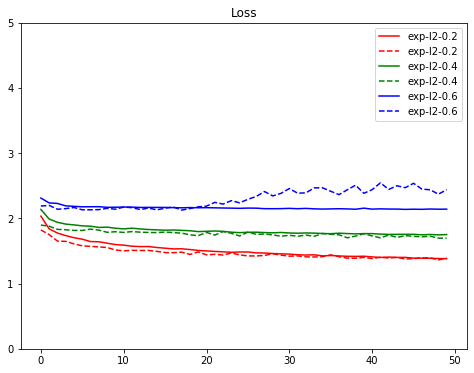

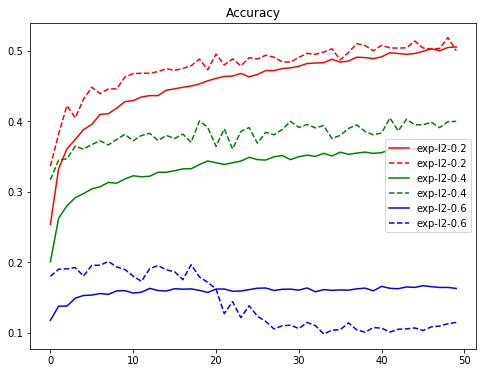

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
"""
Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()